
0: 640x640 1 01011001, 23.0ms
Speed: 2.0ms preprocess, 23.0ms inference, 82.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 04017001, 20.0ms
Speed: 3.0ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 01011001, 1 04017001, 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 07014001, 24.0ms
Speed: 2.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 07014001, 22.0ms
Speed: 3.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 06012004, 22.0ms
Speed: 2.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 06012004, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 06012004, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 1.0ms postprocess

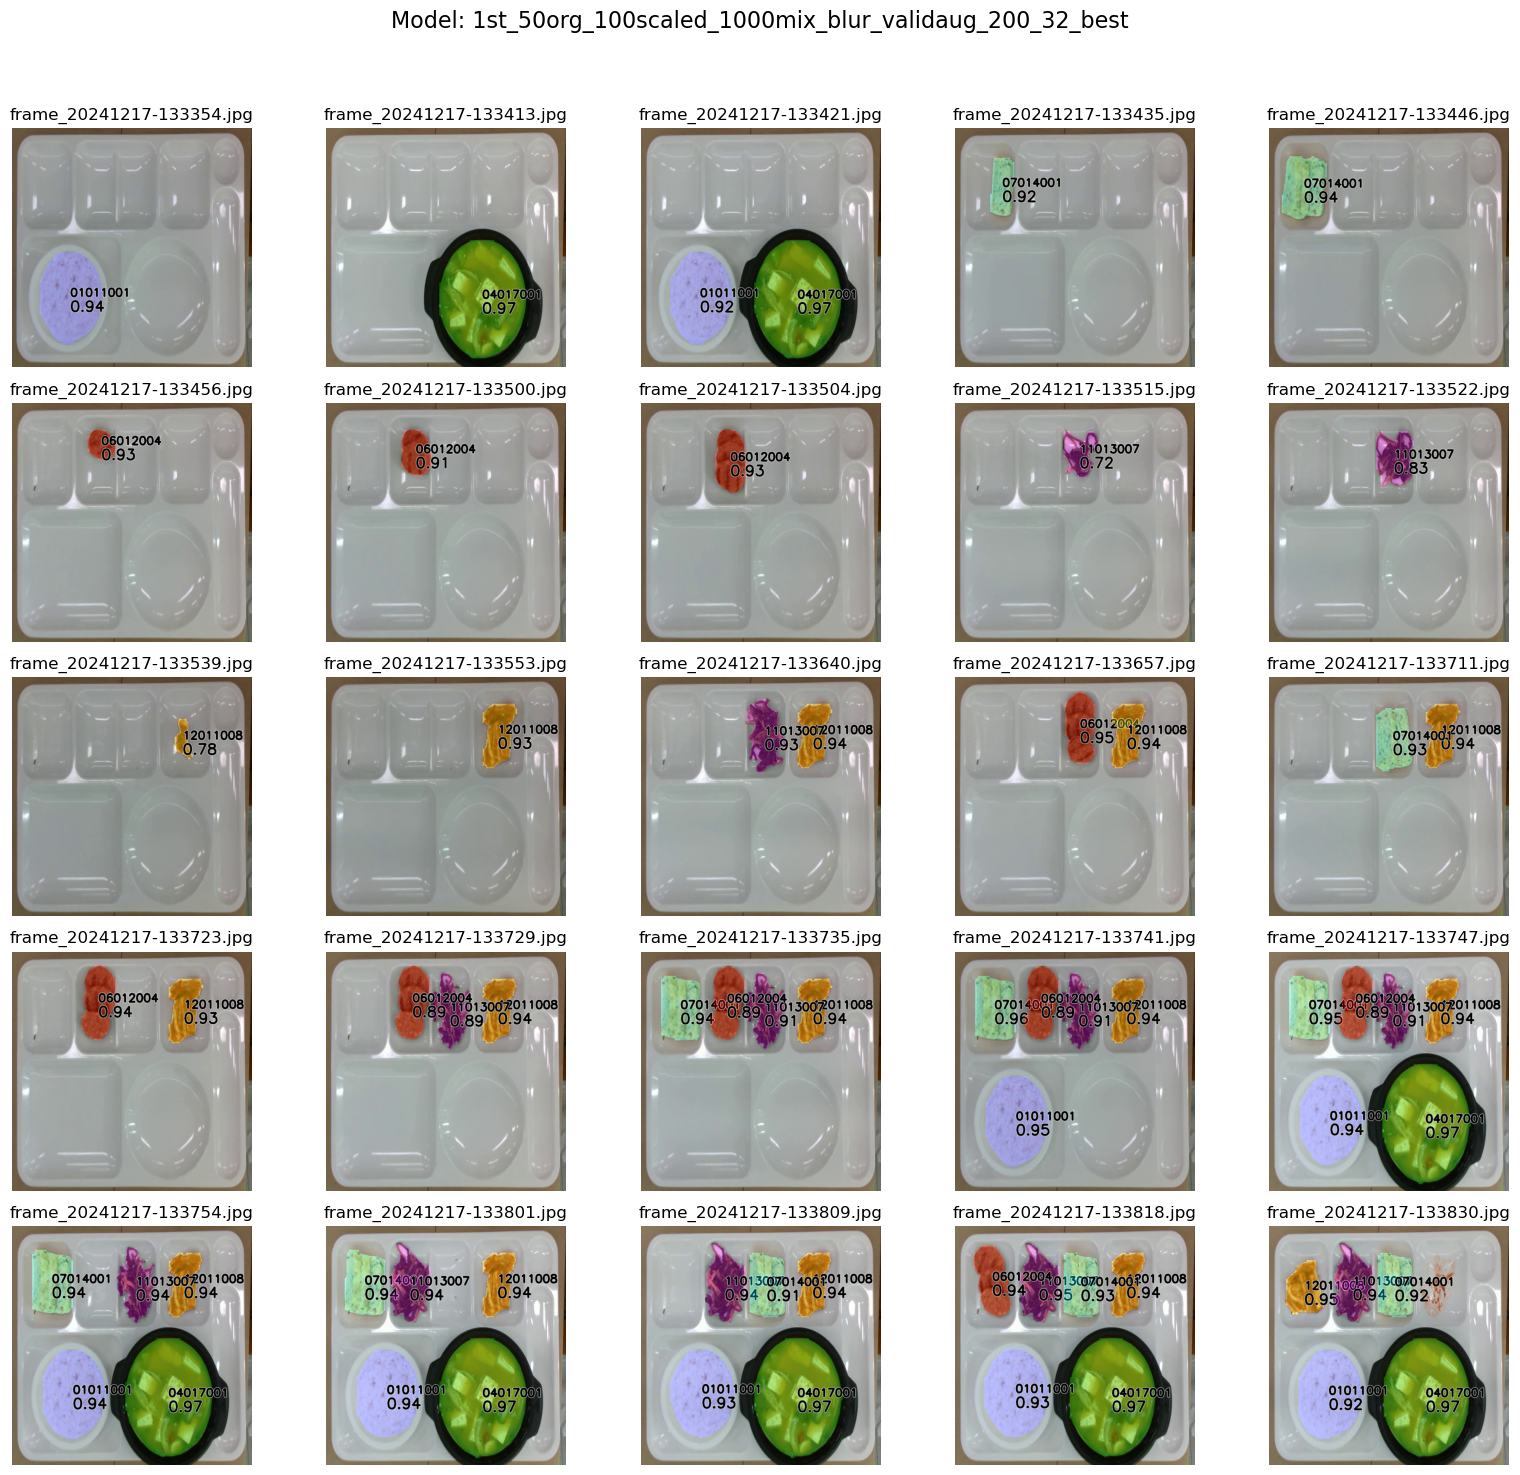

모델 '1st_50org_100scaled_1000mix_blur_validaug_200_32_best'의 결과를 'C:/Users/Sesame/Desktop/saved_frames_for_test/visualization_results\1st_50org_100scaled_1000mix_blur_validaug_200_32_best.png'에 저장했습니다.

0: 640x640 1 07014001, 96.0ms
Speed: 2.0ms preprocess, 96.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 04017001, 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 01011001, 1 04017001, 1 07014001, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 07014001, 23.0ms
Speed: 2.0ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 07014001, 22.0ms
Speed: 2.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 22.0ms
Speed: 2.0ms preprocess, 22.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
fr

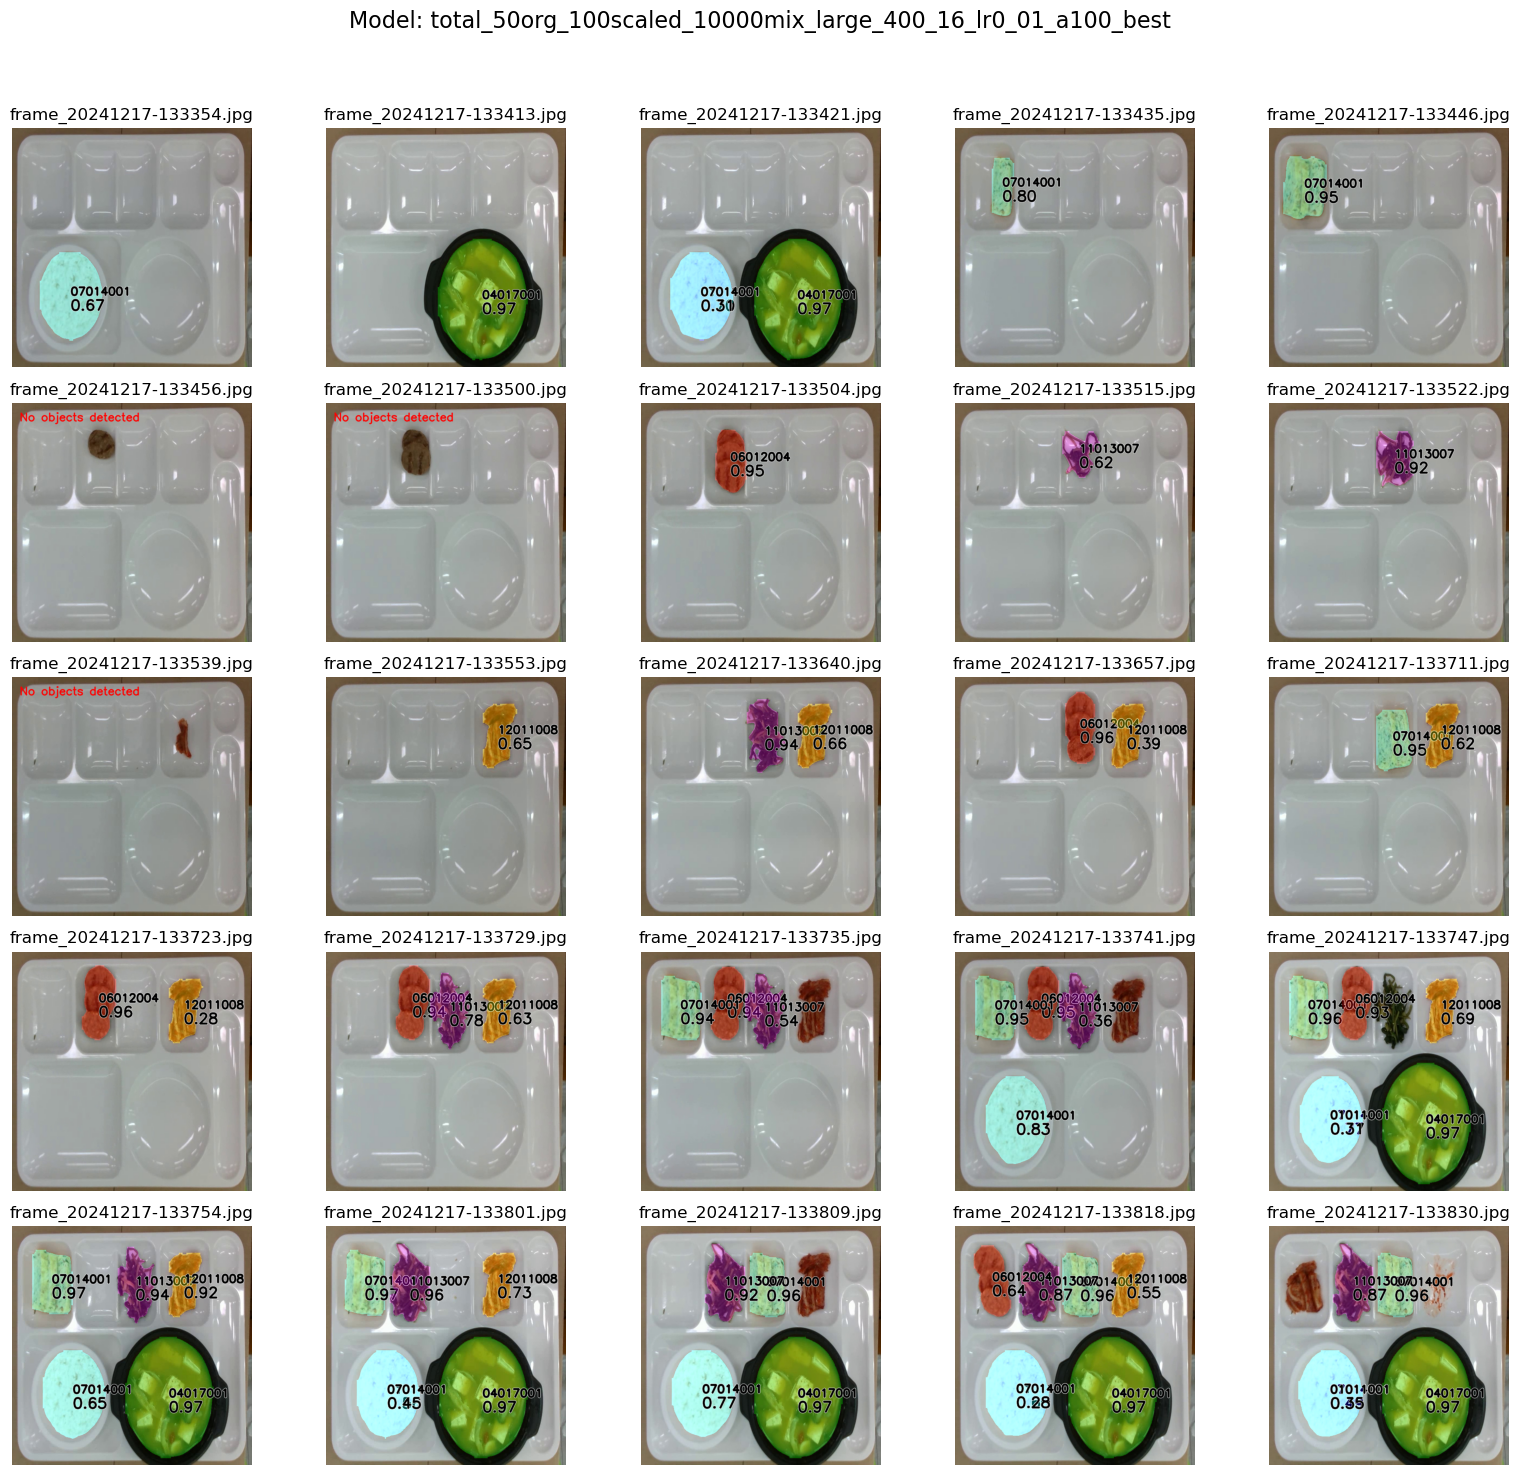

모델 'total_50org_100scaled_10000mix_large_400_16_lr0_01_a100_best'의 결과를 'C:/Users/Sesame/Desktop/saved_frames_for_test/visualization_results\total_50org_100scaled_10000mix_large_400_16_lr0_01_a100_best.png'에 저장했습니다.


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

# 1. 모델 및 이미지 경로 설정
model_folder = 'C:/Users/Sesame/Desktop/1st_241220'  # 모델들이 있는 폴더 경로
image_folder = 'C:/Users/Sesame/Desktop/saved_frames_for_test'  # 테스트할 이미지들이 저장된 폴더 경로
output_folder = 'C:/Users/Sesame/Desktop/saved_frames_for_test/visualization_results' # 테스트 결과이미지를 저장할 폴더

# 결과 저장 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


# 테스트할 이미지 파일 가져오기
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 클래스별 색상 정의 (6개 클래스)
colors = [
    (255, 0, 0),   # Class 0 - Red(쌀밥)
    (0, 255, 0),   # Class 1 - Green(된장찌개)
    (0, 0, 255),   # Class 2 - Blue(떡갈비)
    (255, 255, 0), # Class 3 - Cyan(계란말이)
    (255, 0, 255), # Class 4 - Magenta(시금치)
    (0, 255, 255)  # Class 5 - Yellow(배추김치)
]

# 모델별 시각화 함수
def plot_grid(images_with_titles, rows, cols, grid_title, save_path):
    """이미지를 n행 × n열 그리드로 표시, 모델명 그리드 제목 포함"""
    fig, axes = plt.subplots(rows, cols, figsize=(16, 15))
    for i, (img, title) in enumerate(images_with_titles):
        ax = axes.flatten()[i] if i < len(axes.flatten()) else None
        if ax:
            ax.imshow(img)
            ax.set_title(title)
            ax.axis('off')
    fig.suptitle(grid_title, fontsize=16)
    # plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect로 아래쪽 여백 추가 (top의 최대값을 낮춤)
    plt.savefig(save_path)  # 파일 저장
    plt.show()

# 2. 모델 폴더에서 모든 모델 파일 순회
model_files = [f for f in os.listdir(model_folder) if f.lower().endswith('.pt')]

for model_file in model_files:  # 모델 파일 순회
    model_path = os.path.join(model_folder, model_file)
    model = YOLO(model_path)  # YOLO 모델 로드
    model_name = os.path.splitext(model_file)[0]  # 모델 파일명에서 확장자 제거

    processed_images = []  # 해당 모델에 대한 이미지 결과 저장

    for image_file in image_files:  # 이미지 파일 순회
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (640, 640))  # 이미지 리사이즈
        overlay_image = resized_image.copy()  # 원본 이미지 복사 (초기화)

        results = model(resized_image)  # YOLO 예측 수행

        # 결과 처리
        if not results[0].masks:  # 탐지되는 객체가 없을 경우
            print(f"{image_file} - 탐지되는 객체 없음")
            cv2.putText(overlay_image, "No objects detected", (20, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)
        else:
            masks = results[0].masks.data.cpu().numpy()
            boxes = results[0].boxes

            # Segmentation 마스크 및 텍스트 처리
            for i, mask in enumerate(masks):
                class_id = int(boxes.cls[i].item())
                confidence = boxes.conf[i].item()

                # 색상 범위 검사: 인덱스를 벗어나면 흰색 적용
                color = colors[class_id] if class_id < len(colors) else (255, 255, 255)

                # 반투명 마스크 적용
                mask_color = np.zeros_like(resized_image, dtype=np.uint8)
                mask_color[mask > 0.5] = color
                overlay_image = cv2.addWeighted(overlay_image, 1.0, mask_color, 0.3, 0)

                # 마스크 중심 좌표 계산
                y_coords, x_coords = np.where(mask > 0.5)
                if len(x_coords) > 0 and len(y_coords) > 0:
                    x_center, y_center = int(np.mean(x_coords)), int(np.mean(y_coords))

                    # 클래스명 및 confidence 표시
                    class_text = f"{model.names[class_id]}" if class_id < len(model.names) else f"Class {class_id}"
                    confidence_text = f"{confidence:.2f}"
                    # cv2.putText(overlay_image, class_text, (x_center, y_center),
                    # 뒤에 오는 text가 앞 text를 덮어씌우므로 앞에 오는 텍스트의 굵기가 더 굵어야 효과가 있다.
                    cv2.putText(overlay_image, class_text, (x_center, y_center),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,255,255), 5, cv2.LINE_AA) # 하얀 테두리를 먼저 굵게 그리고
                    cv2.putText(overlay_image, class_text, (x_center, y_center),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 3, cv2.LINE_AA) # 테두리보다는 얇은 검정 글자를 덮어씌우면됨
                    line_spacing = int(40)  # 글자 간격: fontScale과 비례해서 조절
                    cv2.putText(overlay_image, confidence_text, (x_center, y_center + line_spacing),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255,255,255), 5, cv2.LINE_AA)
                    cv2.putText(overlay_image, confidence_text, (x_center, y_center + line_spacing),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3, cv2.LINE_AA)


        # 결과 저장
        processed_images.append((cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB), image_file))

    # 모델별 그리드 표시
    total_images = len(processed_images)
    cols = 5
    rows = (total_images // cols) + 1 if total_images % cols != 0 else total_images // cols

    # 저장 경로 설정
    save_filename = f"{model_name}.png"
    save_path = os.path.join(output_folder, save_filename)

    # 시각화 실행
    plot_grid(processed_images, rows=rows, cols=cols, grid_title=f"Model: {model_name}", save_path=save_path)
    print(f"모델 '{model_name}'의 결과를 '{save_path}'에 저장했습니다.")
